In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('passengers.csv')

# Преобразуем столбец с датами в формат datetime
df['Month'] = pd.to_datetime(df['Month'])

# Установим 'Month' как индекс
df.set_index('Month', inplace=True)

# Посмотрим на первые строки
print(df.head())

            #Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121


## Работаем с passengers


Описание годовой сезонности

<Figure size 1200x600 with 0 Axes>

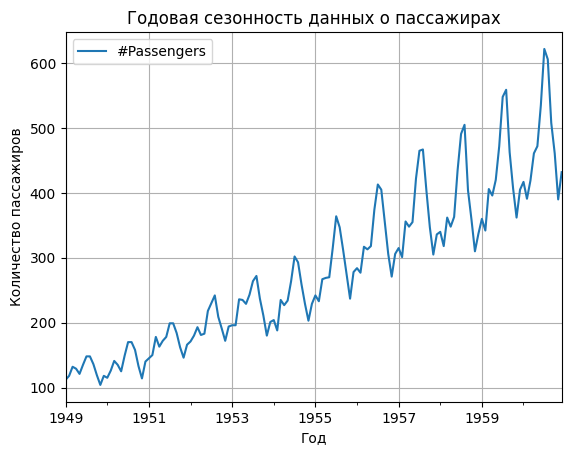

In [5]:
# Построим график годовой сезонности
plt.figure(figsize=(12, 6))
df.plot()
plt.title('Годовая сезонность данных о пассажирах')
plt.xlabel('Год')
plt.ylabel('Количество пассажиров')
plt.grid(True)
plt.show()


Исследование данных по отдельному месяцу

<Figure size 1200x600 with 0 Axes>

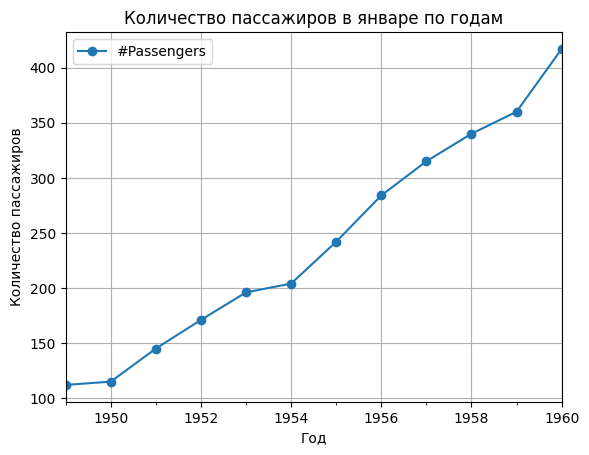

In [6]:
# Выберем данные за январь каждого года
january_data = df[df.index.month == 1]

# Построим график
plt.figure(figsize=(12, 6))
january_data.plot(marker='o')
plt.title('Количество пассажиров в январе по годам')
plt.xlabel('Год')
plt.ylabel('Количество пассажиров')
plt.grid(True)
plt.show()


 Июль по разным годам


<Figure size 1200x600 with 0 Axes>

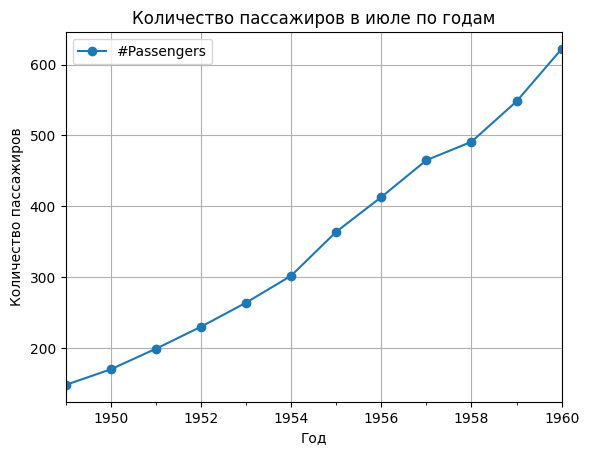

In [7]:
# Выберем данные за июль каждого года
july_data = df[df.index.month == 7]

# Построим график
plt.figure(figsize=(12, 6))
july_data.plot(marker='o')
plt.title('Количество пассажиров в июле по годам')
plt.xlabel('Год')
plt.ylabel('Количество пассажиров')
plt.grid(True)
plt.show()



Среднее и дисперсия по данным внутри каждого года

In [10]:
# Добавим столбец с годом
df['Year'] = df.index.year

# Посчитаем среднее и дисперсию по каждому году
yearly_stats = df.groupby('Year')['#Passengers'].agg(['mean', 'var'])

print(yearly_stats)


            mean          var
Year                         
1949  126.666667   188.242424
1950  139.666667   363.696970
1951  170.166667   339.969697
1952  197.000000   527.454545
1953  225.000000   810.363636
1954  238.916667  1219.719697
1955  284.000000  1775.818182
1956  328.250000  2290.750000
1957  368.416667  3351.356061
1958  381.000000  4164.181818
1959  428.333333  4876.242424
1960  476.166667  6043.060606


Абсолютные и относительные разности


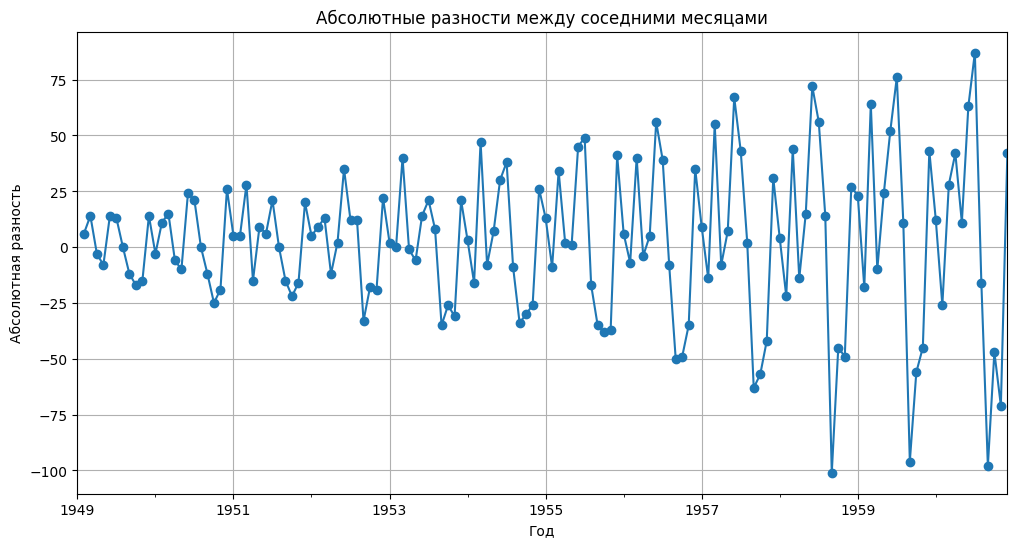

In [11]:
# Абсолютные разности между соседними месяцами
df['Abs_Diff'] = df['#Passengers'].diff()

# Построим график
plt.figure(figsize=(12, 6))
df['Abs_Diff'].plot(marker='o')
plt.title('Абсолютные разности между соседними месяцами')
plt.xlabel('Год')
plt.ylabel('Абсолютная разность')
plt.grid(True)
plt.show()


Относительные разности (в % прироста)

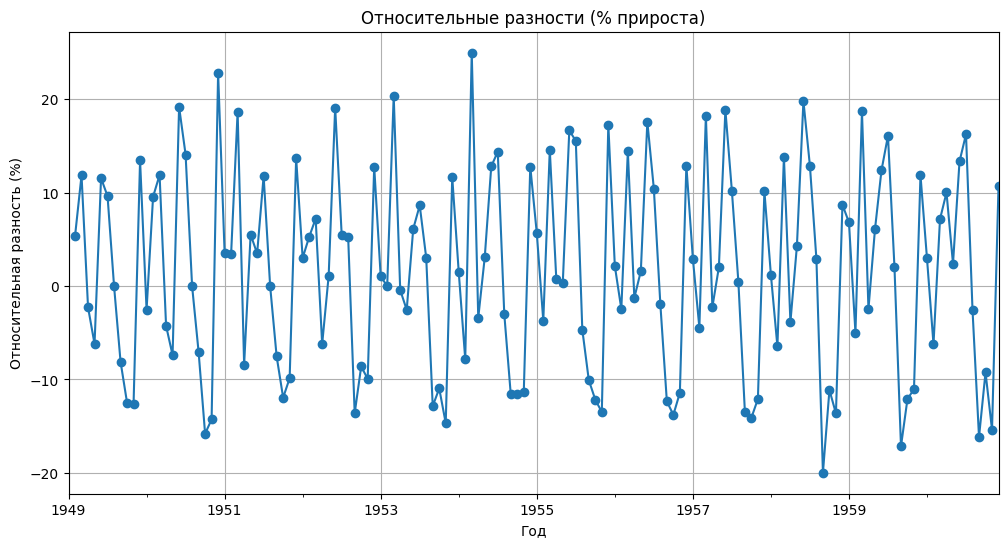

In [12]:
# Относительные разности
df['Rel_Diff'] = df['#Passengers'].pct_change() * 100

# Построим график
plt.figure(figsize=(12, 6))
df['Rel_Diff'].plot(marker='o')
plt.title('Относительные разности (% прироста)')
plt.xlabel('Год')
plt.ylabel('Относительная разность (%)')
plt.grid(True)
plt.show()


Изменение частоты дискретизации


C:\Users\user\AppData\Local\Temp\ipykernel_22852\3461119547.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_data = df.resample('Y').sum()
C:\Users\user\AppData\Local\Temp\ipykernel_22852\3461119547.py:5: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_data = df.resample('Q').sum()


<Figure size 1200x600 with 0 Axes>

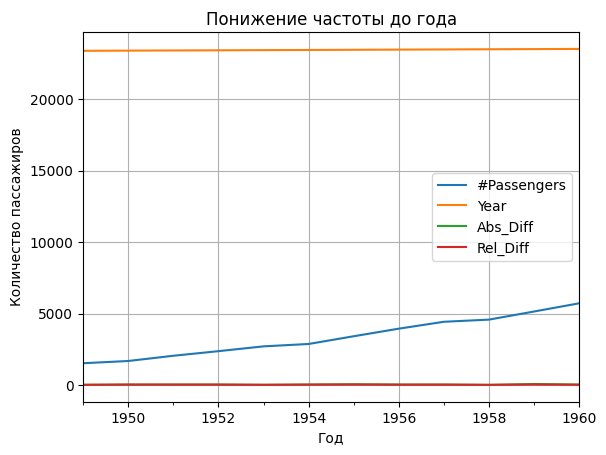

<Figure size 1200x600 with 0 Axes>

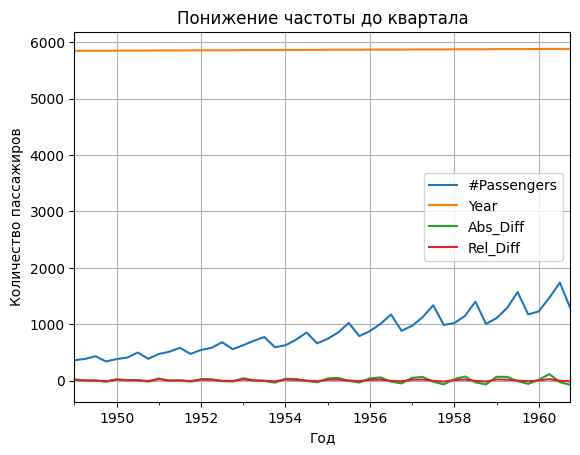

In [13]:
# Понижение частоты до года
yearly_data = df.resample('Y').sum()

# Понижение частоты до квартала
quarterly_data = df.resample('Q').sum()

# Графики
plt.figure(figsize=(12, 6))
yearly_data.plot(label='Yearly')
plt.title('Понижение частоты до года')
plt.xlabel('Год')
plt.ylabel('Количество пассажиров')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
quarterly_data.plot(label='Quarterly')
plt.title('Понижение частоты до квартала')
plt.xlabel('Год')
plt.ylabel('Количество пассажиров')
plt.grid(True)
plt.show()


Повышение частоты дискретизации до дня и недели


<Figure size 1200x600 with 0 Axes>

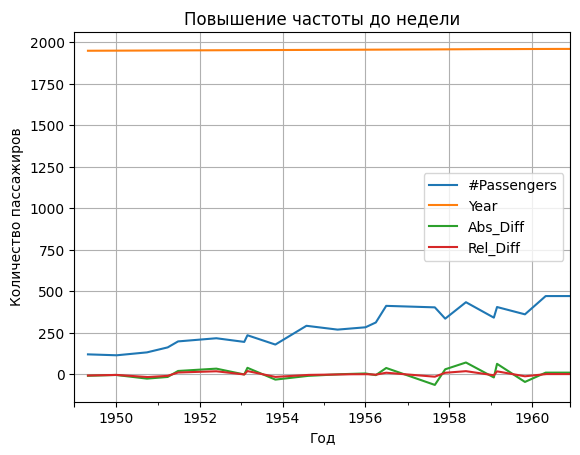

<Figure size 1200x600 with 0 Axes>

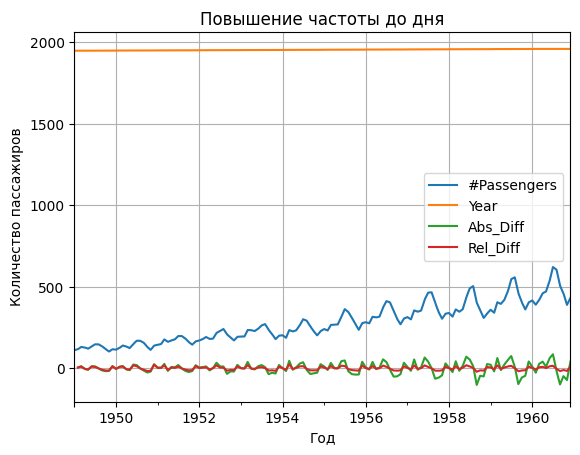

In [14]:
# Повышение частоты до недели (интерполяция)
weekly_data = df.resample('W').interpolate(method='linear')

# Повышение частоты до дня (интерполяция)
daily_data = df.resample('D').interpolate(method='linear')

# Графики
plt.figure(figsize=(12, 6))
weekly_data.plot(label='Weekly')
plt.title('Повышение частоты до недели')
plt.xlabel('Год')
plt.ylabel('Количество пассажиров')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
daily_data.plot(label='Daily')
plt.title('Повышение частоты до дня')
plt.xlabel('Год')
plt.ylabel('Количество пассажиров')
plt.grid(True)
plt.show()


## Работаем с Pasengers2 восполненного на ЛР2

In [15]:
# Загрузим неполный датасет
df2 = pd.read_csv('passengers2.csv')

# Преобразуем столбец с датами в формат datetime
df2['Month'] = pd.to_datetime(df2['Month'])

# Восполним пропуски с помощью линейной интерполяции
df2['target_filled'] = df2['target'].interpolate(method='linear')

# Установим 'Month' как индекс
df2.set_index('Month', inplace=True)

# Посмотрим на первые строки
print(df2.head())

            reference  target  missing  target_filled
Month                                                
1949-01-01        112   112.0      NaN          112.0
1949-02-01        118   118.0      NaN          118.0
1949-03-01        132   132.0      NaN          132.0
1949-04-01        129     NaN    129.0          126.5
1949-05-01        121   121.0      NaN          121.0


Описание годовой сезонности


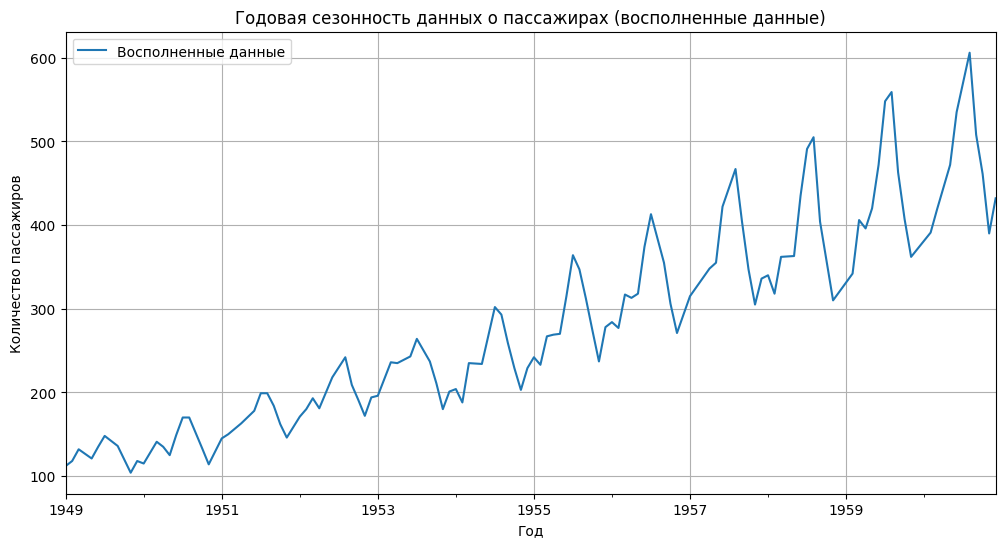

In [16]:
# Построим график годовой сезонности для восполненных данных
plt.figure(figsize=(12, 6))
df2['target_filled'].plot(label='Восполненные данные')
plt.title('Годовая сезонность данных о пассажирах (восполненные данные)')
plt.xlabel('Год')
plt.ylabel('Количество пассажиров')
plt.grid(True)
plt.legend()
plt.show()


Исследование данных по отдельному месяцу


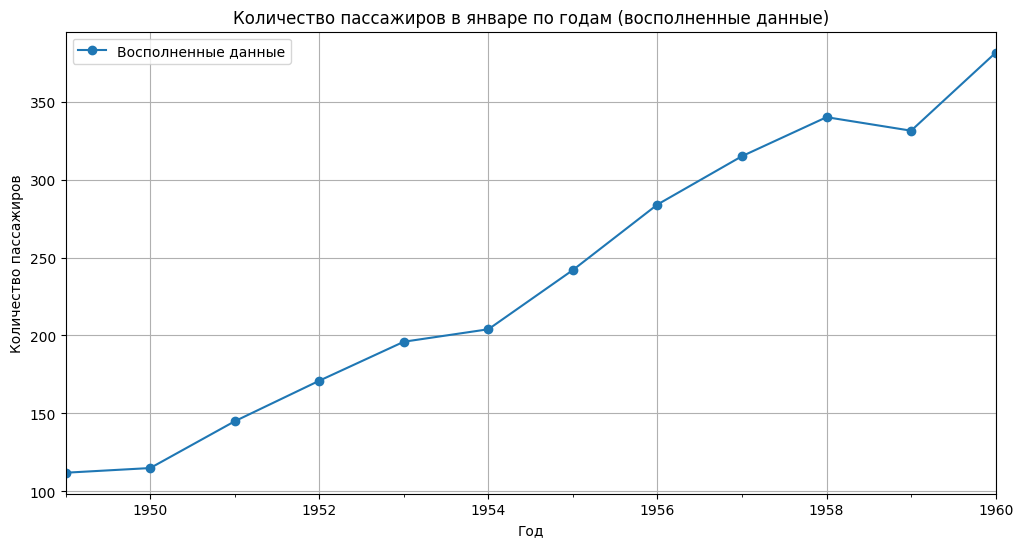

In [17]:
# Выберем данные за январь каждого года
january_data_filled = df2[df2.index.month == 1]

# Построим график
plt.figure(figsize=(12, 6))
january_data_filled['target_filled'].plot(marker='o', label='Восполненные данные')
plt.title('Количество пассажиров в январе по годам (восполненные данные)')
plt.xlabel('Год')
plt.ylabel('Количество пассажиров')
plt.grid(True)
plt.legend()
plt.show()


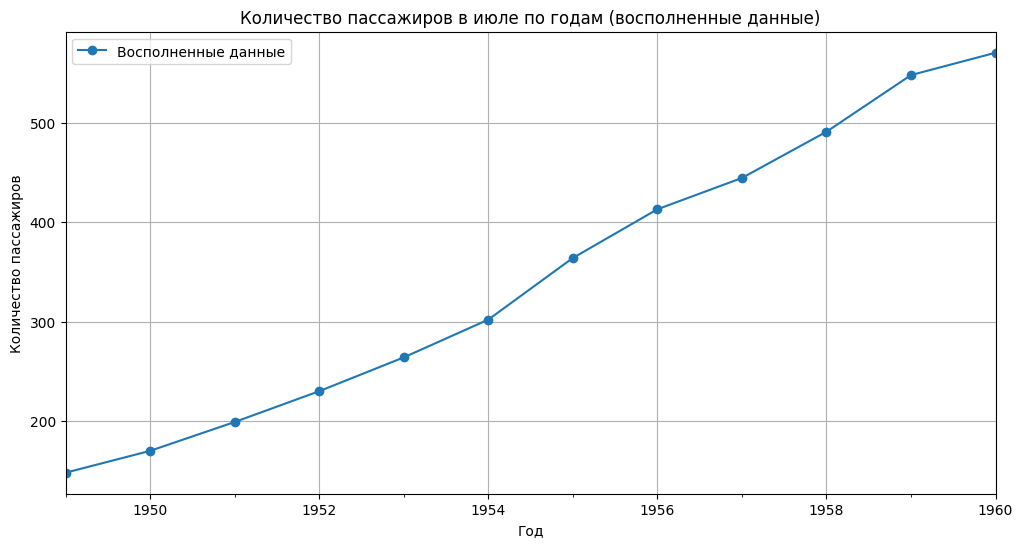

In [18]:
# Выберем данные за июль каждого года
july_data_filled = df2[df2.index.month == 7]

# Построим график
plt.figure(figsize=(12, 6))
july_data_filled['target_filled'].plot(marker='o', label='Восполненные данные')
plt.title('Количество пассажиров в июле по годам (восполненные данные)')
plt.xlabel('Год')
plt.ylabel('Количество пассажиров')
plt.grid(True)
plt.legend()
plt.show()


Среднее и дисперсия по данным внутри каждого года


In [19]:
df2['Year'] = df2.index.year

# Посчитаем среднее и дисперсию по каждому году для восполненных данных
yearly_stats_filled = df2.groupby('Year')['target_filled'].agg(['mean', 'var'])

print(yearly_stats_filled)

            mean          var
Year                         
1949  126.041667   166.020833
1950  138.416667   348.946970
1951  167.625000   354.823864
1952  198.375000   508.142045
1953  225.708333   615.384470
1954  239.875000  1227.278409
1955  284.000000  1775.818182
1956  325.416667  2096.992424
1957  367.208333  2854.066288
1958  380.680556  4259.466961
1959  423.166667  5520.414141
1960  467.611111  5402.708754


Абсолютные и относительные разности


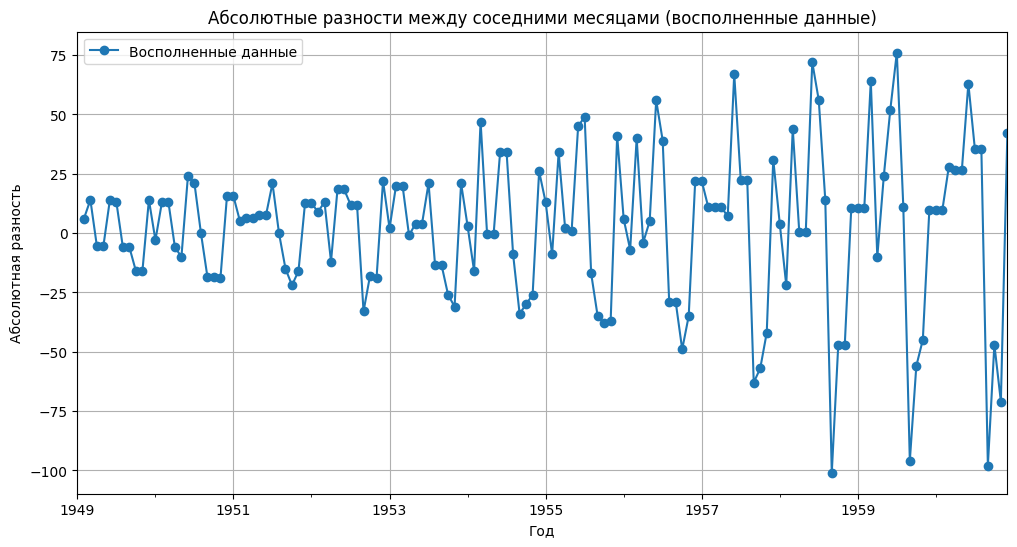

In [20]:
# Абсолютные разности между соседними месяцами для восполненных данных
df2['Abs_Diff'] = df2['target_filled'].diff()

# Построим график
plt.figure(figsize=(12, 6))
df2['Abs_Diff'].plot(marker='o', label='Восполненные данные')
plt.title('Абсолютные разности между соседними месяцами (восполненные данные)')
plt.xlabel('Год')
plt.ylabel('Абсолютная разность')
plt.grid(True)
plt.legend()
plt.show()


 Относительные разности (в % прироста)


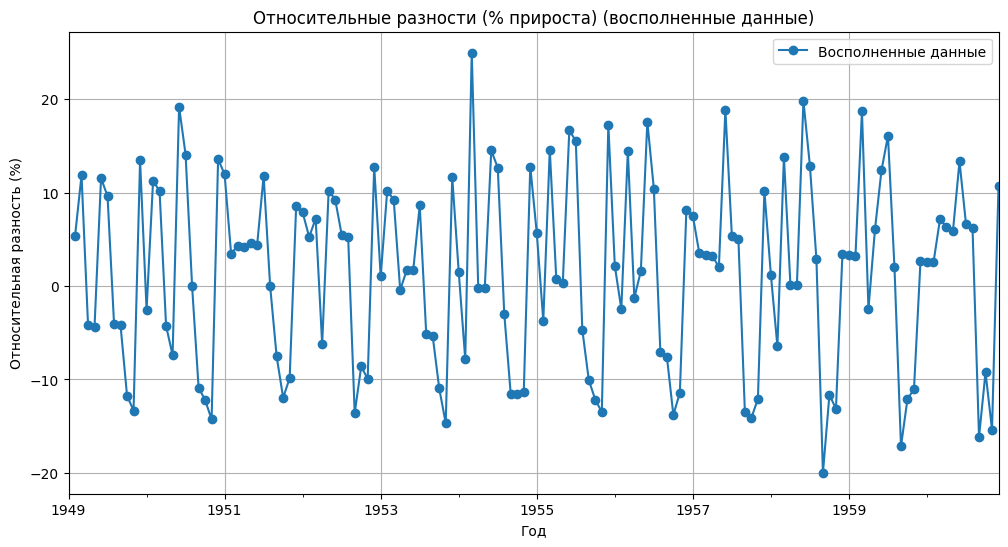

In [21]:
# Относительные разности для восполненных данных
df2['Rel_Diff'] = df2['target_filled'].pct_change() * 100

# Построим график
plt.figure(figsize=(12, 6))
df2['Rel_Diff'].plot(marker='o', label='Восполненные данные')
plt.title('Относительные разности (% прироста) (восполненные данные)')
plt.xlabel('Год')
plt.ylabel('Относительная разность (%)')
plt.grid(True)
plt.legend()
plt.show()


  Изменение частоты дискретизации


C:\Users\user\AppData\Local\Temp\ipykernel_22852\1719114272.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_data_filled = df2['target_filled'].resample('Y').sum()
C:\Users\user\AppData\Local\Temp\ipykernel_22852\1719114272.py:5: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_data_filled = df2['target_filled'].resample('Q').sum()


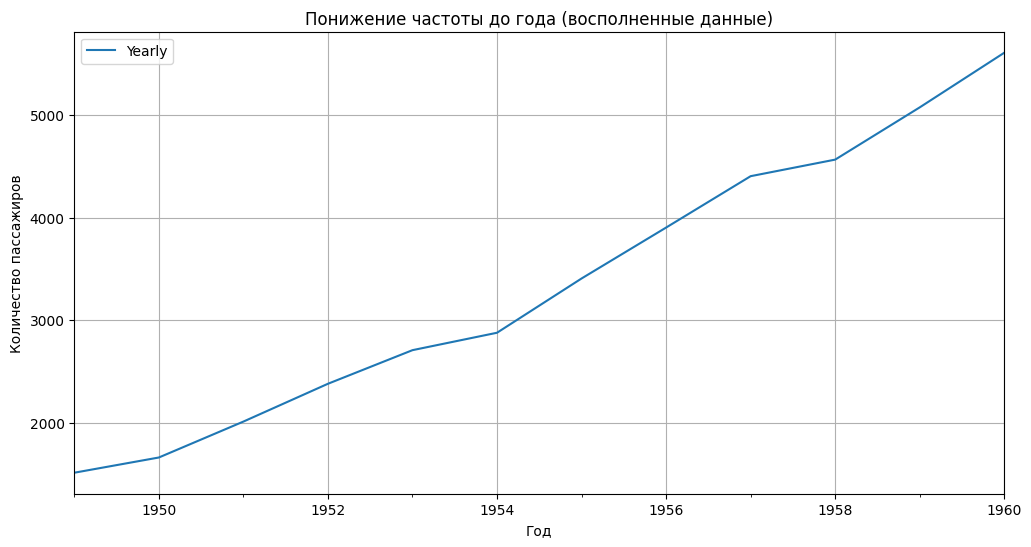

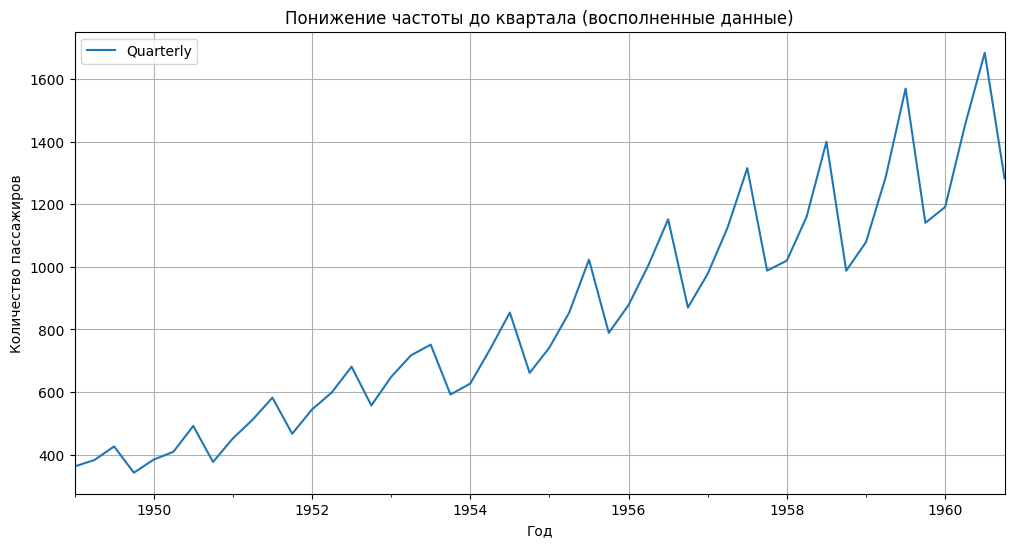

In [22]:
# Понижение частоты до года для восполненных данных
yearly_data_filled = df2['target_filled'].resample('Y').sum()

# Понижение частоты до квартала для восполненных данных
quarterly_data_filled = df2['target_filled'].resample('Q').sum()

# Графики
plt.figure(figsize=(12, 6))
yearly_data_filled.plot(label='Yearly')
plt.title('Понижение частоты до года (восполненные данные)')
plt.xlabel('Год')
plt.ylabel('Количество пассажиров')
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
quarterly_data_filled.plot(label='Quarterly')
plt.title('Понижение частоты до квартала (восполненные данные)')
plt.xlabel('Год')
plt.ylabel('Количество пассажиров')
plt.grid(True)
plt.legend()
plt.show()


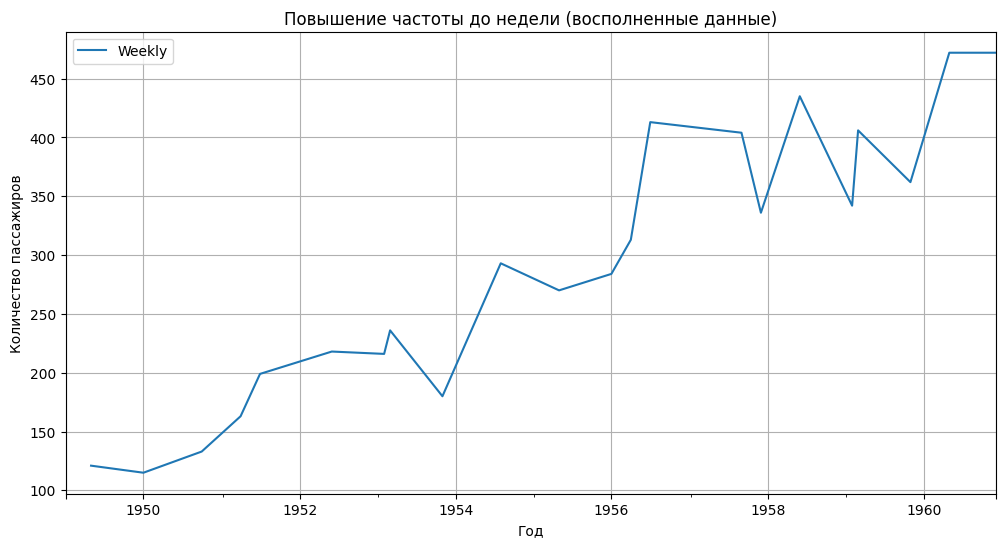

In [23]:
# Повышение частоты до недели (интерполяция) для восполненных данных
weekly_data_filled = df2['target_filled'].resample('W').interpolate(method='linear')

# График
plt.figure(figsize=(12, 6))
weekly_data_filled.plot(label='Weekly')
plt.title('Повышение частоты до недели (восполненные данные)')
plt.xlabel('Год')
plt.ylabel('Количество пассажиров')
plt.grid(True)
plt.legend()
plt.show()


In [26]:
df2.to_csv('df2.csv')

In [28]:
df.to_csv('df.csv')

## Сравнение

In [29]:
import pandas as pd

# Загрузим данные
df = pd.read_csv('df.csv')
df2 = pd.read_csv('df2.csv')

# Преобразуем столбец с датами в формат datetime
df['Month'] = pd.to_datetime(df['Month'])
df2['Month'] = pd.to_datetime(df2['Month'])

# Установим 'Month' как индекс
df.set_index('Month', inplace=True)
df2.set_index('Month', inplace=True)

# Вычислим абсолютные и относительные разности для df, если их нет
if 'Abs_Diff' not in df.columns:
    df['Abs_Diff'] = df['Passengers'].diff()
if 'Rel_Diff' not in df.columns:
    df['Rel_Diff'] = df['Passengers'].pct_change() * 100

# Вычислим абсолютные и относительные разности для df2, если их нет
if 'Abs_Diff' not in df2.columns:
    df2['Abs_Diff'] = df2['target_filled'].diff()
if 'Rel_Diff' not in df2.columns:
    df2['Rel_Diff'] = df2['target_filled'].pct_change() * 100

# Объединим данные для удобства сравнения
comparison_df = pd.DataFrame({
    'Abs_Diff_df': df['Abs_Diff'],
    'Abs_Diff_df2': df2['Abs_Diff'],
    'Rel_Diff_df': df['Rel_Diff'],
    'Rel_Diff_df2': df2['Rel_Diff']
})

# Выведем первые несколько строк для сравнения
print(comparison_df.head(10))

# Посчитаем средние значения и стандартные отклонения для сравнения
abs_diff_stats = comparison_df[['Abs_Diff_df', 'Abs_Diff_df2']].describe()
rel_diff_stats = comparison_df[['Rel_Diff_df', 'Rel_Diff_df2']].describe()

print("\nСтатистика для абсолютных разностей:")
print(abs_diff_stats)

print("\nСтатистика для относительных разностей:")
print(rel_diff_stats)


            Abs_Diff_df  Abs_Diff_df2  Rel_Diff_df  Rel_Diff_df2
Month                                                           
1949-01-01          NaN           NaN          NaN           NaN
1949-02-01          6.0           6.0     5.357143      5.357143
1949-03-01         14.0          14.0    11.864407     11.864407
1949-04-01         -3.0          -5.5    -2.272727     -4.166667
1949-05-01         -8.0          -5.5    -6.201550     -4.347826
1949-06-01         14.0          14.0    11.570248     11.570248
1949-07-01         13.0          13.0     9.629630      9.629630
1949-08-01          0.0          -6.0     0.000000     -4.054054
1949-09-01        -12.0          -6.0    -8.108108     -4.225352
1949-10-01        -17.0         -16.0   -12.500000    -11.764706

Статистика для абсолютных разностей:
       Abs_Diff_df  Abs_Diff_df2
count   143.000000    143.000000
mean      2.237762      2.237762
std      33.754282     31.723728
min    -101.000000   -101.000000
25%     -16.00000

Сравнение абсолютных разностей (Abs_Diff):


Общие тенденции:

В большинстве месяцев значения абсолютных разностей в обоих датасетах совпадают (например, в феврале, марте, июне, июле 1949 года).
Однако в некоторых месяцах (апрель, август, сентябрь, октябрь 1949 года) наблюдаются различия между Abs_Diff_df и Abs_Diff_df2.

Статистические показатели:

Среднее значение: Одинаковое для обоих датасетов (2.24), что говорит о сохранении общей тенденции изменений.
Стандартное отклонение: В полных данных (Abs_Diff_df) стандартное отклонение выше (33.75 против 31.72), что указывает на большую изменчивость в исходных данных.
Медиана: В восполненных данных (Abs_Diff_df2) медиана выше (6.5 против 4), что может свидетельствовать о сглаживании резких изменений.
Максимальные и минимальные значения: Максимальное значение в полных данных выше (87 против 76), что также указывает на большую изменчивость в исходных данных.
Общие тенденции:

Относительные разности в феврале, марте, июне и июле совпадают для обоих датасетов.
В апреле, августе, сентябре и октябре 1949 года наблюдаются различия между Rel_Diff_df и Rel_Diff_df2.


Статистические показатели:

Среднее значение: Среднее значение относительных разностей в полных данных (Rel_Diff_df) немного выше (1.52 против 1.44), что может указывать на небольшое завышение изменений в исходных данных.
Стандартное отклонение: Стандартное отклонение в полных данных выше (10.76 против 9.98), что также подтверждает большую изменчивость.
Медиана: Медиана в восполненных данных (Rel_Diff_df2) выше (2.53 против 1.49), что может свидетельствовать о сглаживании резких изменений.
Максимальные и минимальные значения: Максимальные и минимальные значения совпадают для обоих датасетов, что говорит о сохранении экстремальных изменений.



Средние значения и экстремумы разностей близки, что подтверждает общую схожесть данных.
Но в некоторых месяцах наблюдаются различия в разностях, что может быть связано с методом восполнения данных. Например, восполнение данных может сглаживать резкие изменения, что приводит к уменьшению стандартного отклонения и изменению медианы.